In [1]:
# Final tumor volume of each treatment regimens

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# The 4 specific treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the last (greatest) timepoint for each mouse
last_timepoints = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge the last timepoints to get tumor volume at last timepoint
final_tumor_volume = pd.merge(last_timepoints, combined_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter for specific treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

# Display.
final_tumor_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [2]:
# Looping the 4 treatment regimens
treatments_to_loop = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments_to_loop:
    
    # Locate rows that contain tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers via upper & lower bounds = quartiles
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Results
    print({treatment})
    print(potential_outliers)


{'Capomulin'}
Series([], Name: Tumor Volume (mm3), dtype: float64)
{'Ramicane'}
Series([], Name: Tumor Volume (mm3), dtype: float64)
{'Infubinol'}
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
{'Ceftamin'}
Series([], Name: Tumor Volume (mm3), dtype: float64)


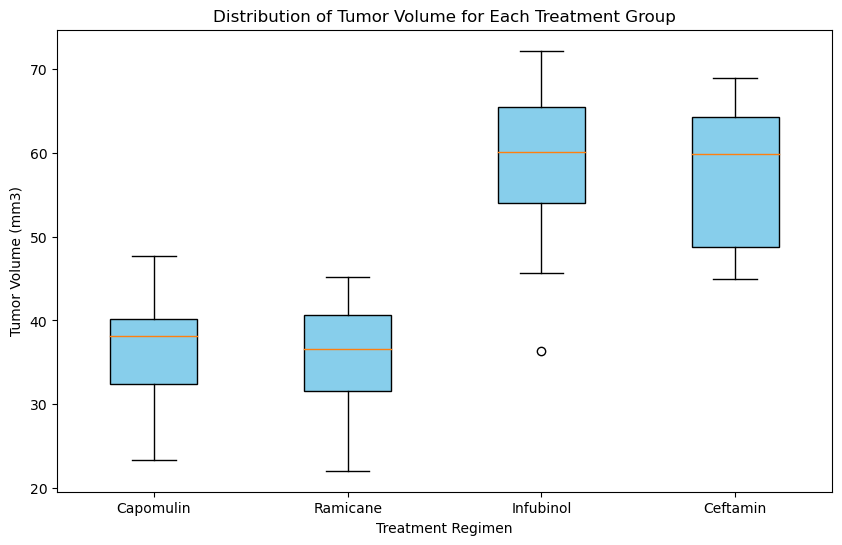

In [3]:
# Box plots showing distribution of the tumor volume for each treatment group with some colour.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments_to_loop, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.show()
